In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.drop(["Unnamed: 32", "id"], axis=1, inplace =True)

In [4]:
data =data.rename(columns = {"diagnosis":"target"})

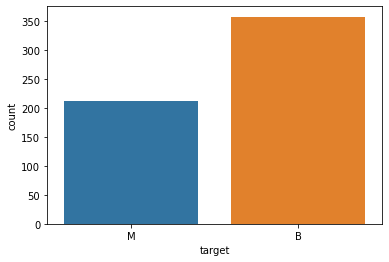

In [5]:
sns.countplot(data["target"]);

In [6]:
data["target"].value_counts()

B    357
M    212
Name: target, dtype: int64

In [51]:
357/569

0.6274165202108963

In [52]:
212/569

0.37258347978910367

* 357 tane iyi huylu, 212 tane kötü huylu


In [7]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data["target"]]

In [8]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.shape

(569, 31)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* veriler arasında büyük bir ölçek farkı var, bu yüzden veriyi scale edicem. Çünkü büyük sayılar küçük sayıları baskılayabilir ve modelimizi büyük olan feature göre biaslyabilir  

In [13]:
data.isna().sum()

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* missing value yok

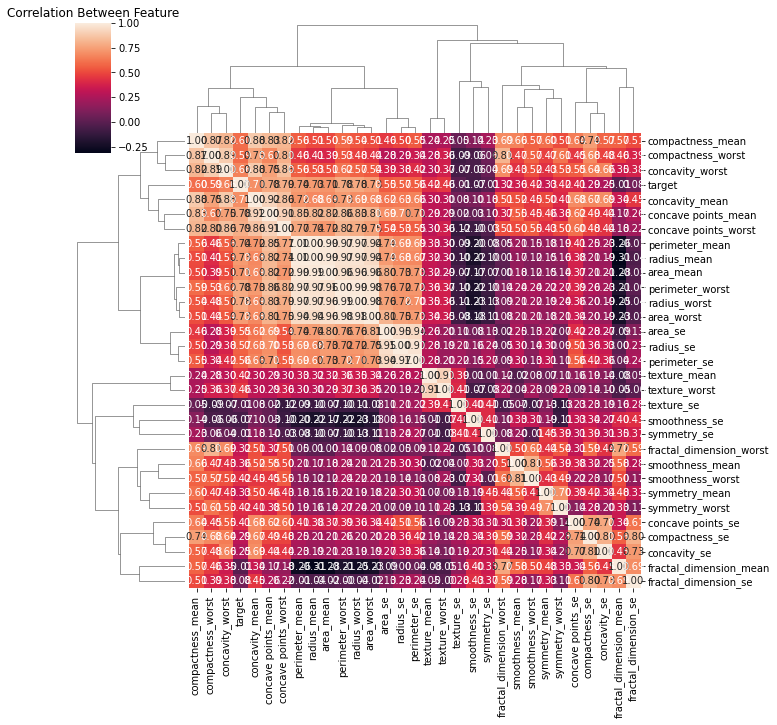

In [17]:
# Correlation
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Feature")
plt.show()

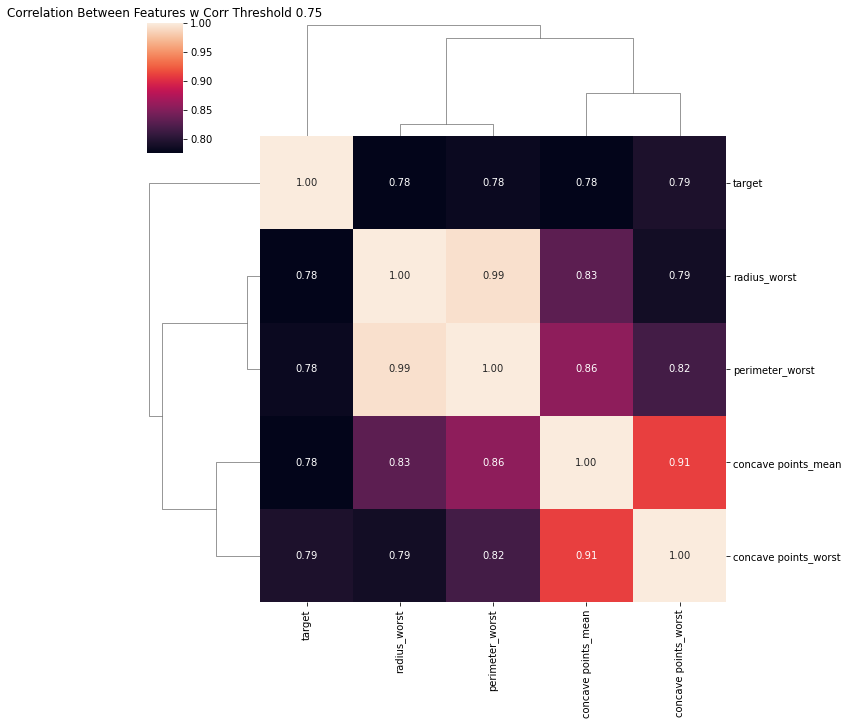

In [19]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt =".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75");

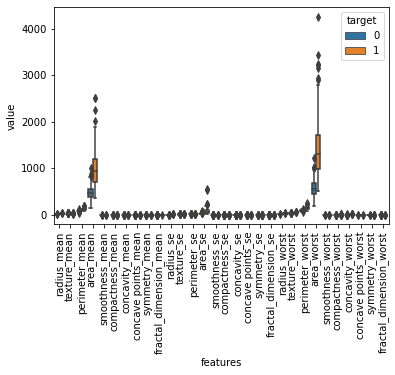

In [20]:
data_melted = pd.melt(data, id_vars = "target",
                     var_name = "features",
                     value_name = "value")

plt.figure()
sns.boxplot(x = "features", y ="value", hue ="target", data = data_melted)
plt.xticks(rotation= 90)
plt.show()

* scale etmediğim için box plottan bir şey anlamadım, scale edip bir daha bakıcam

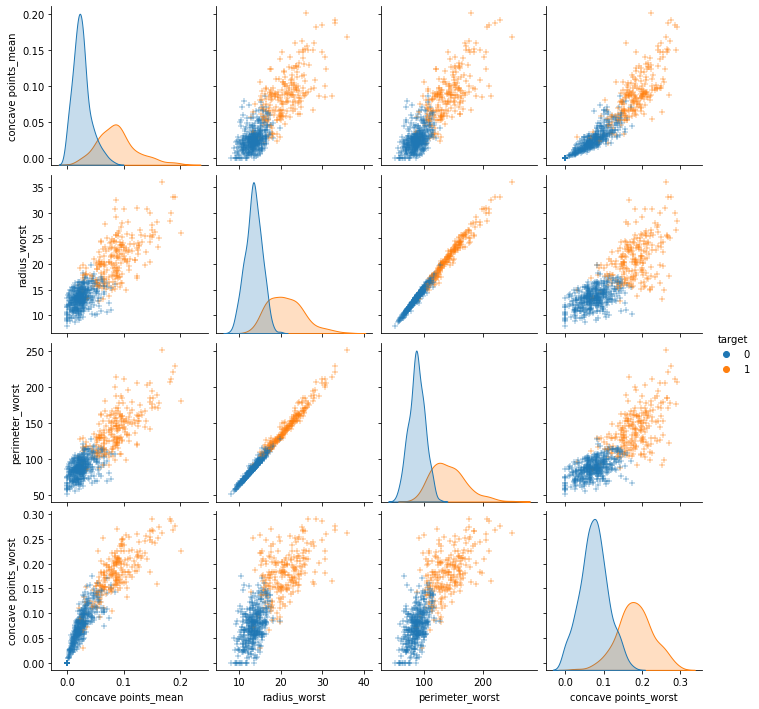

In [21]:
#pair plot
sns.pairplot(data[corr_features], diag_kind ="kde", markers = "+", hue ="target")
plt.show()

* skewness söz konusu. Skew data cok oldugu için Local Outilier Factor kullanıcam.

In [24]:
#outlier
y = data["target"]
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
y_pred


array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

* * -1 ler inlier yani outlier olmayanlar, 1 ler outlier değerler

In [28]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score


,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936
...,...
564,-1.330082
565,-0.997906
566,-0.997441
567,-0.993730


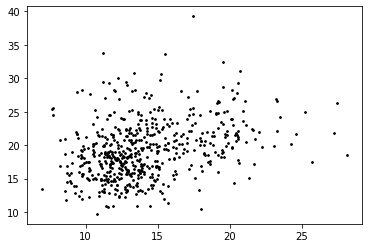

In [29]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k", s = 3, label = "Data Points");

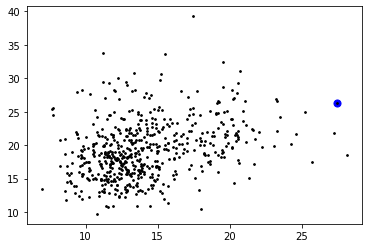

In [36]:
threshold = -2.5 
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color ="blue",s = 50,label ="Outlier")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k",s =3,label ="Data Points")



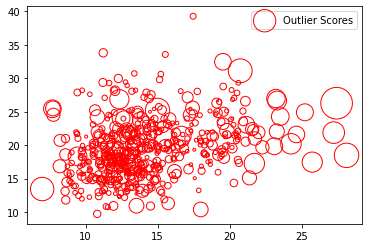

In [32]:
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min()) #normalization
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1], s = 1000* radius, edgecolors = "r", facecolors ="none", label = "Outlier Scores")
plt.legend()
plt.show()

In [42]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [43]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train_df = pd.DataFrame(X_train,columns = columns)
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.497494,-1.073749,-1.379543,-1.160029,0.135881,0.973654,-0.025866,-0.523567,0.368583,3.748516,...,-1.367290,-1.636531,-1.355982,-1.048088,-0.481514,-0.036959,-0.638602,-1.034066,-1.010604,1.421056
394,-0.718174,-0.197010,-0.704330,-0.689902,1.326521,-0.031346,-0.223452,-0.360813,-0.007761,0.350328,...,-0.656559,0.624700,-0.661404,-0.631799,1.610316,0.113949,0.095984,0.124773,-0.123711,0.424820
395,0.032261,-0.555784,-0.080644,-0.075809,-2.303586,-1.496809,-1.039653,-1.120156,-1.099533,-1.229967,...,-0.287322,-0.807912,-0.391138,-0.346027,-2.004940,-1.338808,-1.173282,-1.261790,-0.682839,-1.276726
396,-0.055526,0.109492,-0.046842,-0.168160,0.730110,0.195463,0.315536,0.429860,-0.499617,0.383481,...,0.157015,0.880940,0.197816,-0.022013,1.284147,0.725664,0.706523,1.079240,0.475584,1.255302


In [46]:
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.608187e-16,-5.810539e-16,-6.058805e-16,2.041918e-16,-1.896863e-17,-1.087907e-16,-1.737862e-16,-1.497964e-16,7.400557e-16,2.945717e-16,...,6.058805e-16,-1.980549e-16,-3.057298e-16,-1.991707e-16,8.828784e-16,-1.439385e-16,1.246909e-16,8.926416e-17,-2.807637e-16,1.506333e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.836464e+00,-2.245111e+00,-1.810311e+00,-1.365377e+00,-2.433051e+00,-1.640911e+00,-1.132915e+00,-1.286097e+00,-2.370161e+00,-1.754890e+00,...,-1.587373e+00,-2.243853e+00,-1.600220e+00,-1.154748e+00,-2.197162e+00,-1.446868e+00,-1.370635e+00,-1.784161e+00,-2.117613e+00,-1.628809e+00
25%,-6.863161e-01,-7.102232e-01,-6.781539e-01,-6.517481e-01,-7.572809e-01,-7.800619e-01,-7.523426e-01,-7.367012e-01,-6.980367e-01,-6.905392e-01,...,-6.701191e-01,-7.380288e-01,-6.906849e-01,-6.320618e-01,-7.587574e-01,-6.855591e-01,-7.760495e-01,-7.829110e-01,-6.511070e-01,-7.077340e-01
50%,-2.551700e-01,-1.090984e-01,-2.587218e-01,-3.167308e-01,-9.722838e-02,-2.350839e-01,-3.369099e-01,-3.804602e-01,-5.620170e-02,-1.849553e-01,...,-2.737620e-01,-5.832825e-02,-2.911130e-01,-3.407646e-01,-2.705181e-02,-2.683733e-01,-2.159212e-01,-2.283327e-01,-1.213010e-01,-1.927549e-01
75%,5.419902e-01,5.692460e-01,5.510809e-01,3.839945e-01,6.191923e-01,5.332330e-01,5.017380e-01,6.776427e-01,5.679340e-01,4.618745e-01,...,5.048709e-01,6.496585e-01,5.428353e-01,3.147198e-01,6.187627e-01,6.232624e-01,5.931956e-01,7.297391e-01,4.394337e-01,4.691161e-01
max,3.945850e+00,4.780684e+00,3.967339e+00,5.137153e+00,4.904988e+00,4.068820e+00,4.357306e+00,4.055859e+00,4.608979e+00,4.803888e+00,...,4.120586e+00,3.999076e+00,4.353182e+00,5.915678e+00,3.767380e+00,4.640507e+00,3.241075e+00,2.535233e+00,6.033124e+00,5.113359e+00


In [47]:
X_train_df["target"] = y_train

In [48]:
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748,NaN
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807,1.0
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264,NaN
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899,1.0
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.497494,-1.073749,-1.379543,-1.160029,0.135881,0.973654,-0.025866,-0.523567,0.368583,3.748516,...,-1.636531,-1.355982,-1.048088,-0.481514,-0.036959,-0.638602,-1.034066,-1.010604,1.421056,NaN
394,-0.718174,-0.197010,-0.704330,-0.689902,1.326521,-0.031346,-0.223452,-0.360813,-0.007761,0.350328,...,0.624700,-0.661404,-0.631799,1.610316,0.113949,0.095984,0.124773,-0.123711,0.424820,NaN
395,0.032261,-0.555784,-0.080644,-0.075809,-2.303586,-1.496809,-1.039653,-1.120156,-1.099533,-1.229967,...,-0.807912,-0.391138,-0.346027,-2.004940,-1.338808,-1.173282,-1.261790,-0.682839,-1.276726,NaN
396,-0.055526,0.109492,-0.046842,-0.168160,0.730110,0.195463,0.315536,0.429860,-0.499617,0.383481,...,0.880940,0.197816,-0.022013,1.284147,0.725664,0.706523,1.079240,0.475584,1.255302,NaN


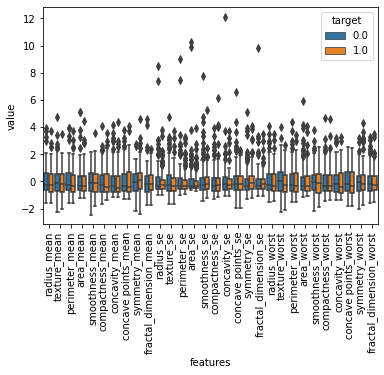

In [50]:
#boxplot
data_melted = pd.melt(X_train_df, id_vars = "target",
                     var_name = "features",
                     value_name = "value")

plt.figure()
sns.boxplot(x = "features", y ="value", hue ="target", data = data_melted)
plt.xticks(rotation= 90)
plt.show()

In [55]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(X_test,y_test)
print("Score: ", score)
print("Cm: ", cm)
print("accuracy: ",acc)  

Score:  0.9532163742690059
Cm:  [[107   1]
 [  7  56]]
accuracy:  0.9532163742690059


In [73]:
#hyperparameter tuning

def KNN_Best_Params(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn , param_grid, cv =10, scoring ="accuracy")
    grid.fit(X_train,y_train)
    
    print(f"Best training score: {grid.best_score_} with parameters: {grid.best_params_}")
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(X_train,y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    
    cm_test = confusion_matrix(y_test,y_pred_test)
    cm_train = confusion_matrix(y_train,y_pred_train)
    
    acc_test = accuracy_score(y_test,y_pred_test)
    acc_train = accuracy_score(y_train,y_pred_train)
    print(f"Test Score: {acc_test}, Train Score: {acc_train}")
    print()
    print("CM test: ", cm_test)
    print("CM train: ",cm_train)
    
    return grid

In [74]:
grid = KNN_Best_Params(X_train,X_test,y_train,y_test)


Best training score: 0.9648076923076923 with parameters: {'n_neighbors': 8, 'weights': 'distance'}

Test Score: 0.9590643274853801, Train Score: 1.0

CM test:  [[105   3]
 [  4  59]]
CM train:  [[249   0]
 [  0 149]]


* train skorum test skorumdan yüksek çıkmış. Ezberleme yani overfitting söz konusu

In [ ]:
#hyperparamatre yapmadan önce

In [77]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(X_test,y_test)
print("Score: ", score)
print("Cm: ", cm)
print("accuracy: ",acc)  

Score:  0.9532163742690059
Cm:  [[107   1]
 [  7  56]]
accuracy:  0.9532163742690059


In [75]:
y_pred = knn.predict(X_train)

In [76]:
acc = accuracy_score(y_train,y_pred)
acc

0.9698492462311558

* arada sadece 2 puan fark var ve bu fark bana her şeyin yolunda oldugunu gösteriyor. Train setinde genelleşitirme yaptım ezberlemeyi azalttım bu sayede test veri setimde başarıyı azda olsa artırmış oldum.